
# 🚀 Complete Utils.py Demo - Provider Interoperability Showcase

This notebook demonstrates **all major functions** in `utils.py` and shows how they work **interchangeably** across different providers (OpenAI, Google, Anthropic, HuggingFace).

## Key Features Demonstrated:
- ✅ **recommended_models_table** - Filter and display model capabilities
- ✅ **get_completion** - Text generation across providers
- ✅ **get_image_generation_completion** - Image creation
- ✅ **get_vision_completion** - Multimodal vision tasks
- ✅ **get_image_edit_completion** - Image editing
- ✅ **transcribe_audio** - Audio to text

**Important**: The same function signatures work with ANY compatible model!


## 1️⃣ Setup and Imports

In [1]:
# Standard imports
import sys
import os
import time
from IPython.display import Image, display, Markdown

# Add project root to path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import all utils functions
from utils import (
    load_environment,
    setup_llm_client,
    recommended_models_table,
    get_completion,
    get_image_generation_completion,
    get_vision_completion,
    get_image_edit_completion,
    transcribe_audio,
    save_artifact,
    RECOMMENDED_MODELS
)

# Load environment variables
load_environment()

print("✅ Setup complete! All functions imported.")

# Check which API keys are available
available_providers = []
if os.getenv('OPENAI_API_KEY'):
    available_providers.append('OpenAI')
if os.getenv('GOOGLE_API_KEY'):
    available_providers.append('Google')
if os.getenv('ANTHROPIC_API_KEY'):
    available_providers.append('Anthropic')
if os.getenv('HUGGINGFACE_API_KEY'):
    available_providers.append('HuggingFace')

print(f"\n🔑 Available providers: {', '.join(available_providers) if available_providers else 'None (using free models only)'}")

✅ Setup complete! All functions imported.

🔑 Available providers: OpenAI, Google, Anthropic, HuggingFace


## 2️⃣ Model Discovery with `recommended_models_table`

This function helps you find the right model for your task. Filter by:
- **provider**: 'openai', 'google', 'anthropic', 'huggingface'
- **task**: 'text', 'vision', 'image', 'audio'
- **capabilities**: text_generation, vision, image_generation, audio_transcription, image_modification
- **requirements**: min_context, min_output_tokens

In [2]:
print("📊 All available models:")
print("=" * 60)
_ = recommended_models_table()

📊 All available models:


| Model | Provider | Text | Vision | Image Gen | Image Edit | Audio Transcription | Context Window | Max Output Tokens |
|---|---|---|---|---|---|---|---|---|
| Qwen/Qwen-Image | huggingface | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |
| Qwen/Qwen-Image-Edit | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |
| black-forest-labs/FLUX.1-Kontext-dev | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |
| claude-opus-4-1-20250805 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |
| claude-sonnet-4-20250514 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 100,000 |
| deepseek-ai/DeepSeek-V3.1 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 128,000 | 100,000 |
| gemini-2.0-flash-preview-image-generation | google | ❌ | ❌ | ✅ | ✅ | ❌ | 32,000 | 8,192 |
| gemini-2.5-flash | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gemini-2.5-flash-image-preview | google | ❌ | ❌ | ✅ | ✅ | ❌ | 32,768 | 32,768 |
| gemini-2.5-flash-lite | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gemini-2.5-pro | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gemini-live-2.5-flash-preview | google | ❌ | ❌ | ❌ | ❌ | ❌ | 1,048,576 | 8,192 |
| gpt-4.1 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 32,768 |
| gpt-4o | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 128,000 | 16,384 |
| gpt-4o-mini | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 128,000 | 16,384 |
| gpt-5-2025-08-07 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 400,000 | 128,000 |
| gpt-5-mini-2025-08-07 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 400,000 | 128,000 |
| meta-llama/Llama-3.3-70B-Instruct | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 8,192 | 4,096 |
| meta-llama/Llama-4-Maverick-17B-128E-Instruct | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 1,000,000 | 100,000 |
| meta-llama/Llama-4-Scout-17B-16E-Instruct | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 10,000,000 | 100,000 |
| mistralai/Mistral-7B-Instruct-v0.3 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 32,768 | 8,192 |
| o3 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |
| o4-mini | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |
| stabilityai/stable-diffusion-3.5-large | huggingface | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |
| tokyotech-llm/Llama-3.1-Swallow-8B-Instruct-v0.5 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 4,096 | 1,024 |
| veo-3.0-fast-generate-preview | google | ❌ | ❌ | ❌ | ❌ | ❌ | 1,024 | - |
| veo-3.0-generate-preview | google | ❌ | ❌ | ❌ | ❌ | ❌ | 1,024 | - |
| whisper-1 | openai | ❌ | ❌ | ❌ | ❌ | ✅ | - | - |

In [3]:
# Filter examples
print("🎯 Text models with large context (>100k tokens):")
_ = recommended_models_table(text_generation=True, min_context=100_000)

print("\n🖼️ Image generation models:")
_ = recommended_models_table(image_generation=True)

print("\n👁️ Vision-capable models:")
_ = recommended_models_table(vision=True)

print("\n🎵 Audio transcription models:")
_ = recommended_models_table(audio_transcription=True)

print("\n✏️ Image editing models:")
_ = recommended_models_table(image_modification=True)

🎯 Text models with large context (>100k tokens):


| Model | Provider | Text | Vision | Image Gen | Image Edit | Audio Transcription | Context Window | Max Output Tokens |
|---|---|---|---|---|---|---|---|---|
| claude-opus-4-1-20250805 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |
| claude-sonnet-4-20250514 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 100,000 |
| deepseek-ai/DeepSeek-V3.1 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 128,000 | 100,000 |
| gemini-2.5-flash | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gemini-2.5-flash-lite | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gemini-2.5-pro | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gpt-4.1 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 32,768 |
| gpt-4o | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 128,000 | 16,384 |
| gpt-4o-mini | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 128,000 | 16,384 |
| gpt-5-2025-08-07 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 400,000 | 128,000 |
| gpt-5-mini-2025-08-07 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 400,000 | 128,000 |
| meta-llama/Llama-4-Maverick-17B-128E-Instruct | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 1,000,000 | 100,000 |
| meta-llama/Llama-4-Scout-17B-16E-Instruct | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 10,000,000 | 100,000 |
| o3 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |
| o4-mini | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |


🖼️ Image generation models:


| Model | Provider | Text | Vision | Image Gen | Image Edit | Audio Transcription | Context Window | Max Output Tokens |
|---|---|---|---|---|---|---|---|---|
| Qwen/Qwen-Image | huggingface | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |
| gemini-2.0-flash-preview-image-generation | google | ❌ | ❌ | ✅ | ✅ | ❌ | 32,000 | 8,192 |
| gemini-2.5-flash-image-preview | google | ❌ | ❌ | ✅ | ✅ | ❌ | 32,768 | 32,768 |
| stabilityai/stable-diffusion-3.5-large | huggingface | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |


👁️ Vision-capable models:


| Model | Provider | Text | Vision | Image Gen | Image Edit | Audio Transcription | Context Window | Max Output Tokens |
|---|---|---|---|---|---|---|---|---|
| claude-opus-4-1-20250805 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |
| claude-sonnet-4-20250514 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 100,000 |
| gemini-2.5-flash | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gemini-2.5-flash-lite | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gemini-2.5-pro | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gpt-4.1 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 32,768 |
| gpt-4o | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 128,000 | 16,384 |
| gpt-4o-mini | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 128,000 | 16,384 |
| gpt-5-2025-08-07 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 400,000 | 128,000 |
| gpt-5-mini-2025-08-07 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 400,000 | 128,000 |
| o3 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |
| o4-mini | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |


🎵 Audio transcription models:


| Model | Provider | Text | Vision | Image Gen | Image Edit | Audio Transcription | Context Window | Max Output Tokens |
|---|---|---|---|---|---|---|---|---|
| whisper-1 | openai | ❌ | ❌ | ❌ | ❌ | ✅ | - | - |


✏️ Image editing models:


| Model | Provider | Text | Vision | Image Gen | Image Edit | Audio Transcription | Context Window | Max Output Tokens |
|---|---|---|---|---|---|---|---|---|
| Qwen/Qwen-Image-Edit | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |
| black-forest-labs/FLUX.1-Kontext-dev | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |
| gemini-2.0-flash-preview-image-generation | google | ❌ | ❌ | ✅ | ✅ | ❌ | 32,000 | 8,192 |
| gemini-2.5-flash-image-preview | google | ❌ | ❌ | ✅ | ✅ | ❌ | 32,768 | 32,768 |

## 3️⃣ Text Generation with `get_completion` - Provider Interoperability

The **same function** works with models from different providers. Watch how we use identical code with different models:

In [4]:
# Define a common prompt
prompt = "Write a haiku about artificial intelligence."

# Test with different providers (only those with API keys)
test_models = []

if os.getenv('GOOGLE_API_KEY'):
    test_models.append(('gemini-2.5-flash', 'Google'))
if os.getenv('OPENAI_API_KEY'):
    test_models.append(('gpt-4o-mini', 'OpenAI'))
if os.getenv('ANTHROPIC_API_KEY'):
    test_models.append(('claude-sonnet-4-20250514', 'Anthropic'))

# Always available (free tier)
test_models.append(('mistralai/Mistral-7B-Instruct-v0.3', 'HuggingFace'))

print(f"🤖 Testing text generation with {len(test_models)} models...\n")
print(f"Prompt: '{prompt}'\n")
print("=" * 60)

for model_name, provider_name in test_models:
    try:
        # Setup client - SAME function for all providers
        client, model, provider = setup_llm_client(model_name)
        
        if client is None:
            print(f"\n❌ {provider_name} - Could not setup {model_name}")
            continue
            
        # Generate text - SAME function for all providers
        result = get_completion(
            prompt=prompt,
            client=client,
            model_name=model,
            api_provider=provider,
            temperature=0.7
        )
        
        print(f"\n✅ {provider_name} ({model_name}):")
        print(f"{result}")
        
    except Exception as e:
        print(f"\n❌ {provider_name} - Error: {str(e)[:100]}...")

print("\n" + "=" * 60)
print("✨ Notice: Same function, different providers!")

🤖 Testing text generation with 4 models...

Prompt: 'Write a haiku about artificial intelligence.'



2025-10-28 09:55:52,534 ag_aisoftdev.utils INFO LLM Client configured provider=google model=gemini-2.5-flash latency_ms=None artifacts_path=None



✅ Google (gemini-2.5-flash):
Smart circuits hum,
Logic learns, a new mind wakes,
Future's path unfolds.


2025-10-28 09:56:01,535 ag_aisoftdev.utils INFO LLM Client configured provider=openai model=gpt-4o-mini latency_ms=None artifacts_path=None



✅ OpenAI (gpt-4o-mini):
Wires hum softly low,  
Thoughts of silicon arise,  
Dreams in code take flight.


2025-10-28 09:56:03,674 ag_aisoftdev.utils INFO LLM Client configured provider=anthropic model=claude-sonnet-4-20250514 latency_ms=None artifacts_path=None



✅ Anthropic (claude-sonnet-4-20250514):
Here's a haiku about artificial intelligence:

Silicon minds learn,
Processing endless data—
What dreams do they hold?


2025-10-28 09:56:06,602 ag_aisoftdev.utils INFO LLM Client configured provider=huggingface model=mistralai/Mistral-7B-Instruct-v0.3 latency_ms=None artifacts_path=None



✅ HuggingFace (mistralai/Mistral-7B-Instruct-v0.3):
 Silent thoughts, AI weaves,

Patterns of human dreams,

Guided by logic.

✨ Notice: Same function, different providers!


## 4️⃣ Image Generation with `get_image_generation_completion`

Generate images using models from different providers with the **same interface**:

2025-10-28 09:56:07,517 ag_aisoftdev.utils INFO LLM Client configured provider=google model=gemini-2.5-flash-image-preview latency_ms=None artifacts_path=None


🎨 Testing image generation with 3 models...

Prompt: 'A serene Japanese garden with cherry blossoms and a wooden bridge over a koi pond'


🖼️ Generating with Google (gemini-2.5-flash-image-preview)...
✅ Success! Image saved to: C:\Workspace\AG-AISOFTDEV\artifacts\screens\image_1761663375.png


### Google Result:

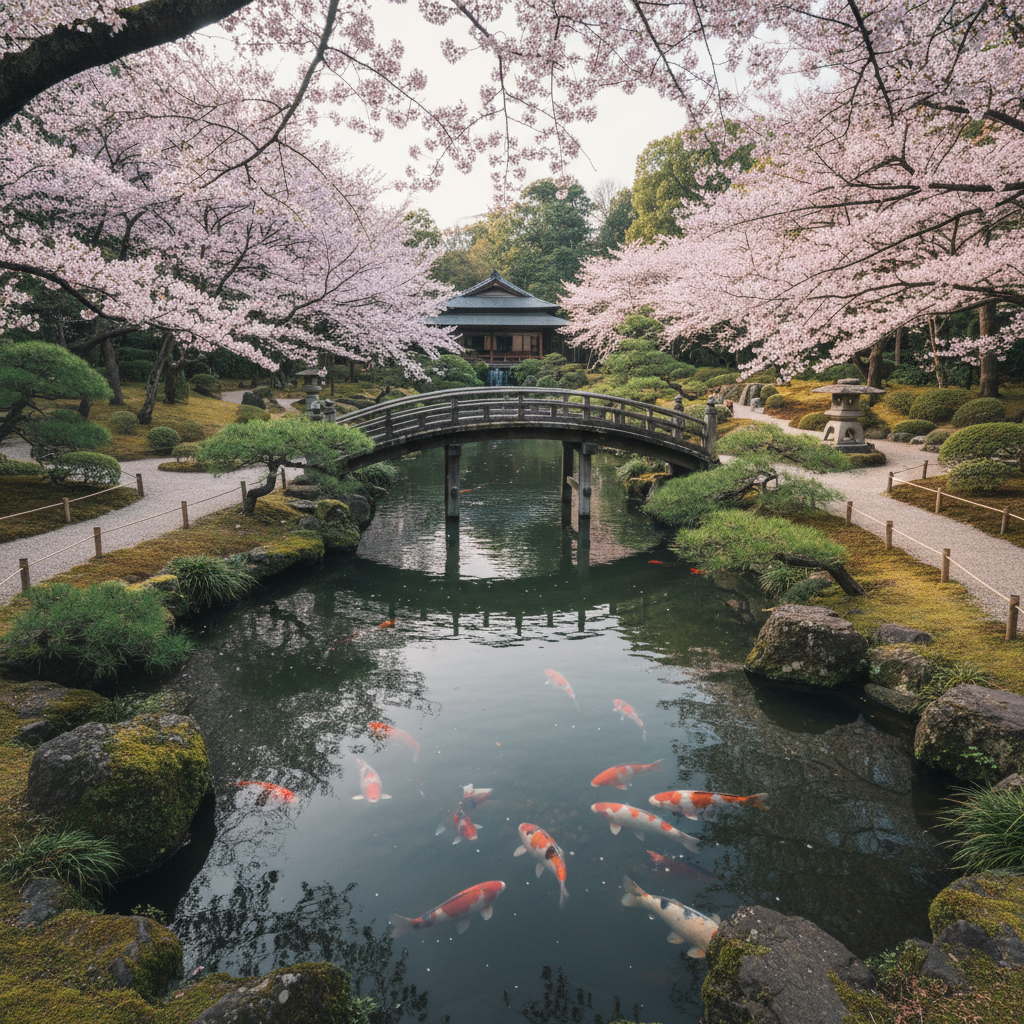

2025-10-28 09:56:16,035 ag_aisoftdev.utils ERROR Model 'dall-e-3' is not in the list of recommended models. provider=None model=dall-e-3 latency_ms=None artifacts_path=None
2025-10-28 09:56:16,047 ag_aisoftdev.utils INFO LLM Client configured provider=huggingface model=stabilityai/stable-diffusion-3.5-large latency_ms=None artifacts_path=None



🖼️ Generating with OpenAI (dall-e-3)...
❌ Could not setup dall-e-3

🖼️ Generating with HuggingFace (stabilityai/stable-diffusion-3.5-large)...
✅ Success! Image saved to: C:\Workspace\AG-AISOFTDEV\artifacts\screens\image_1761663381.png


### HuggingFace Result:

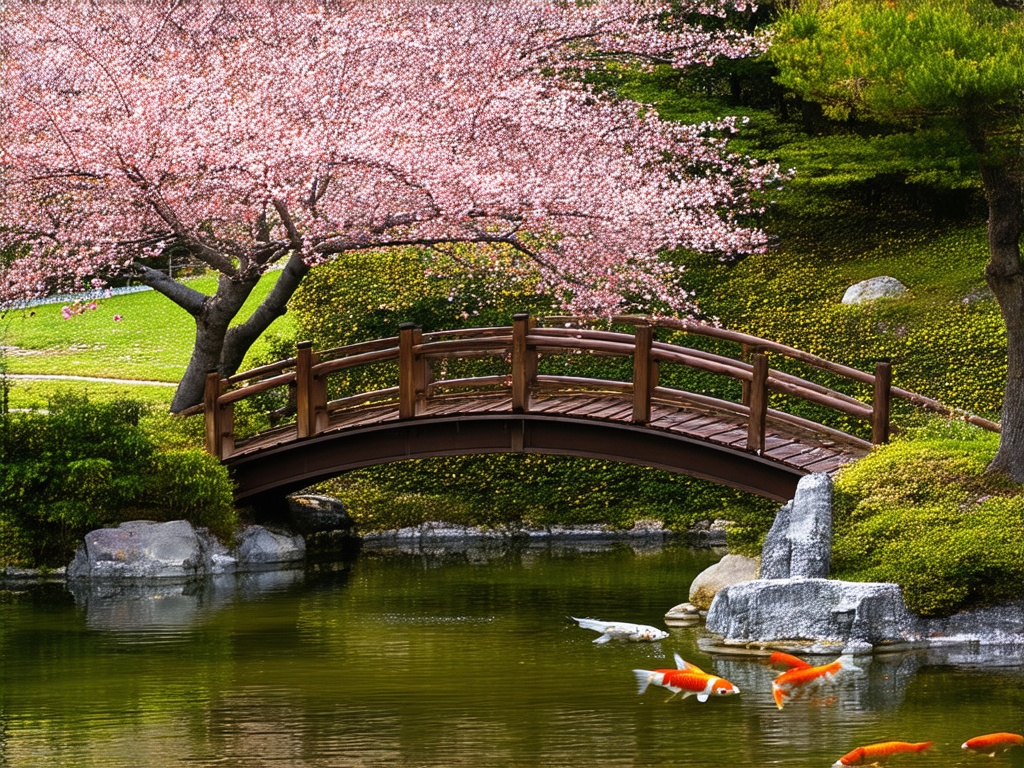


📁 Generated 2 images successfully


In [5]:
# Image generation prompt
image_prompt = "A serene Japanese garden with cherry blossoms and a wooden bridge over a koi pond"

# Models that support image generation
image_models = []

if os.getenv('GOOGLE_API_KEY'):
    image_models.append(('gemini-2.5-flash-image-preview', 'Google'))
if os.getenv('OPENAI_API_KEY'):
    image_models.append(('dall-e-3', 'OpenAI'))

# Free HuggingFace models
image_models.append(('stabilityai/stable-diffusion-3.5-large', 'HuggingFace'))

print(f"🎨 Testing image generation with {len(image_models)} models...\n")
print(f"Prompt: '{image_prompt}'\n")
print("=" * 60)

generated_images = []

for model_name, provider_name in image_models:
    try:
        print(f"\n🖼️ Generating with {provider_name} ({model_name})...")
        
        # Setup client - SAME function
        client, model, provider = setup_llm_client(model_name)
        
        if client is None:
            print(f"❌ Could not setup {model_name}")
            continue
        
        # Generate image - SAME function for all providers
        file_path, data_url = get_image_generation_completion(
            prompt=image_prompt,
            client=client,
            model_name=model,
            api_provider=provider
        )
        
        print(f"✅ Success! Image saved to: {file_path}")
        generated_images.append((file_path, provider_name))
        
        # Display the image
        if os.path.exists(file_path):
            display(Markdown(f"### {provider_name} Result:"))
            display(Image(filename=file_path, width=400))
        
    except Exception as e:
        print(f"❌ Error: {str(e)[:150]}...")

print("\n" + "=" * 60)
print(f"📁 Generated {len(generated_images)} images successfully")

## 5️⃣ Vision Analysis with `get_vision_completion`

Analyze images using vision models from different providers:

Test image created:


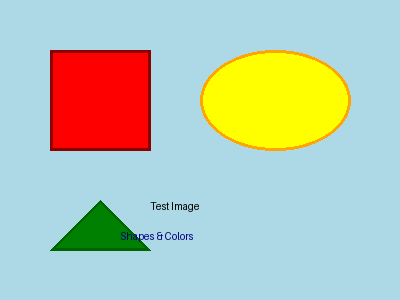


👁️ Testing vision with 3 models...


🔍 Analyzing with Google (gemini-2.5-flash)...


2025-10-28 09:56:21,810 ag_aisoftdev.utils INFO LLM Client configured provider=google model=gemini-2.5-flash latency_ms=None artifacts_path=None
2025-10-28 09:56:36,938 ag_aisoftdev.utils INFO LLM Client configured provider=openai model=gpt-4o latency_ms=None artifacts_path=None


✅ Google Analysis:
This image features a light blue background with three distinct geometric shapes and two lines of text.

Here's a detailed breakdown:

1.  **Background:**
    *   The entire canvas is filled with a solid, light blue color.

2.  **Shapes:**

    *   **Red Square:**
        *   **Shape:** A square.
        *   **Color:** It has a solid, vibrant red fill. The outline is a thin line of a darker red or maroon color, clearly distinct from the fill.
        *   **Position:** Located in the upper-left q...

🔍 Analyzing with OpenAI (gpt-4o)...


2025-10-28 09:56:54,553 ag_aisoftdev.utils ERROR Model 'claude-opus-4-20250514' is not in the list of recommended models. provider=None model=claude-opus-4-20250514 latency_ms=None artifacts_path=None


✅ OpenAI Analysis:
The image contains three shapes and two text elements on a light blue background:

1. **Shapes**:
   - A red square with a black border located in the upper left.
   - A yellow oval with an orange border positioned to the right of the red square.
   - A green triangle with a black border situated below the red square and yellow oval.

2. **Text**:
   - "Test Image" written in black, located below the yellow oval and to the right of the red square.
   - "Shapes & Colors" in blue, positioned below...

🔍 Analyzing with Anthropic (claude-opus-4-20250514)...
❌ Could not setup claude-opus-4-20250514

✨ Same vision function works across providers!


In [6]:
# First, let's create a test image using PIL
from PIL import Image as PILImage, ImageDraw, ImageFont
import io

# Create a simple test image with shapes and text
img = PILImage.new('RGB', (400, 300), color='lightblue')
draw = ImageDraw.Draw(img)

# Draw some shapes
draw.rectangle([50, 50, 150, 150], fill='red', outline='darkred', width=3)
draw.ellipse([200, 50, 350, 150], fill='yellow', outline='orange', width=3)
draw.polygon([(100, 200), (150, 250), (50, 250)], fill='green', outline='darkgreen', width=3)

# Add text
draw.text((150, 200), "Test Image", fill='black')
draw.text((120, 230), "Shapes & Colors", fill='navy')

# Save the test image
test_image_path = 'artifacts/test_vision.png'
os.makedirs(os.path.dirname(test_image_path), exist_ok=True)
img.save(test_image_path)

print("Test image created:")
display(Image(filename=test_image_path, width=400))

# Vision models to test
vision_models = []

if os.getenv('GOOGLE_API_KEY'):
    vision_models.append(('gemini-2.5-flash', 'Google'))
if os.getenv('OPENAI_API_KEY'):
    vision_models.append(('gpt-4o', 'OpenAI'))
if os.getenv('ANTHROPIC_API_KEY'):
    vision_models.append(('claude-opus-4-20250514', 'Anthropic'))

vision_prompt = "Describe the shapes, colors, and text in this image. Be specific about positions and colors."

print(f"\n👁️ Testing vision with {len(vision_models)} models...\n")
print("=" * 60)

for model_name, provider_name in vision_models:
    try:
        print(f"\n🔍 Analyzing with {provider_name} ({model_name})...")
        
        # Setup client - SAME function
        client, model, provider = setup_llm_client(model_name)
        
        if client is None:
            print(f"❌ Could not setup {model_name}")
            continue
        
        # Analyze image - SAME function for all providers
        result = get_vision_completion(
            prompt=vision_prompt,
            image_path_or_url=test_image_path,
            client=client,
            model_name=model,
            api_provider=provider
        )
        
        print(f"✅ {provider_name} Analysis:")
        print(f"{result[:500]}..." if len(result) > 500 else result)
        
    except Exception as e:
        print(f"❌ Error: {str(e)[:150]}...")

print("\n" + "=" * 60)
print("✨ Same vision function works across providers!")

## 6️⃣ Image Editing with `get_image_edit_completion`

Edit existing images using compatible models:

✏️ Testing image editing with 4 models...

Edit instruction: 'Add a rainbow in the background and make the shapes glow'

Original image:


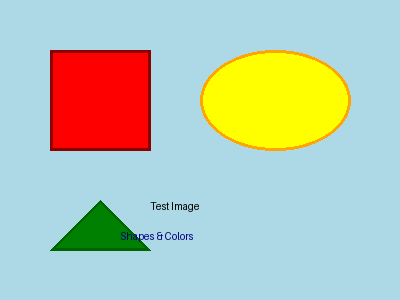

2025-10-28 09:56:54,567 ag_aisoftdev.utils INFO LLM Client configured provider=huggingface model=black-forest-labs/FLUX.1-Kontext-dev latency_ms=None artifacts_path=None



🎨 Editing with HuggingFace (black-forest-labs/FLUX.1-Kontext-dev)...
✅ Success! Edited image saved to: C:\Workspace\AG-AISOFTDEV\artifacts\screens\image_1761663427.png


### HuggingFace Edited Result:

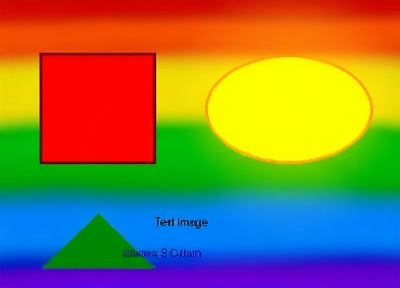

2025-10-28 09:57:07,769 ag_aisoftdev.utils INFO LLM Client configured provider=huggingface model=Qwen/Qwen-Image-Edit latency_ms=None artifacts_path=None



🎨 Editing with HuggingFace (Qwen/Qwen-Image-Edit)...
✅ Success! Edited image saved to: C:\Workspace\AG-AISOFTDEV\artifacts\screens\image_1761663432.png


### HuggingFace Edited Result:

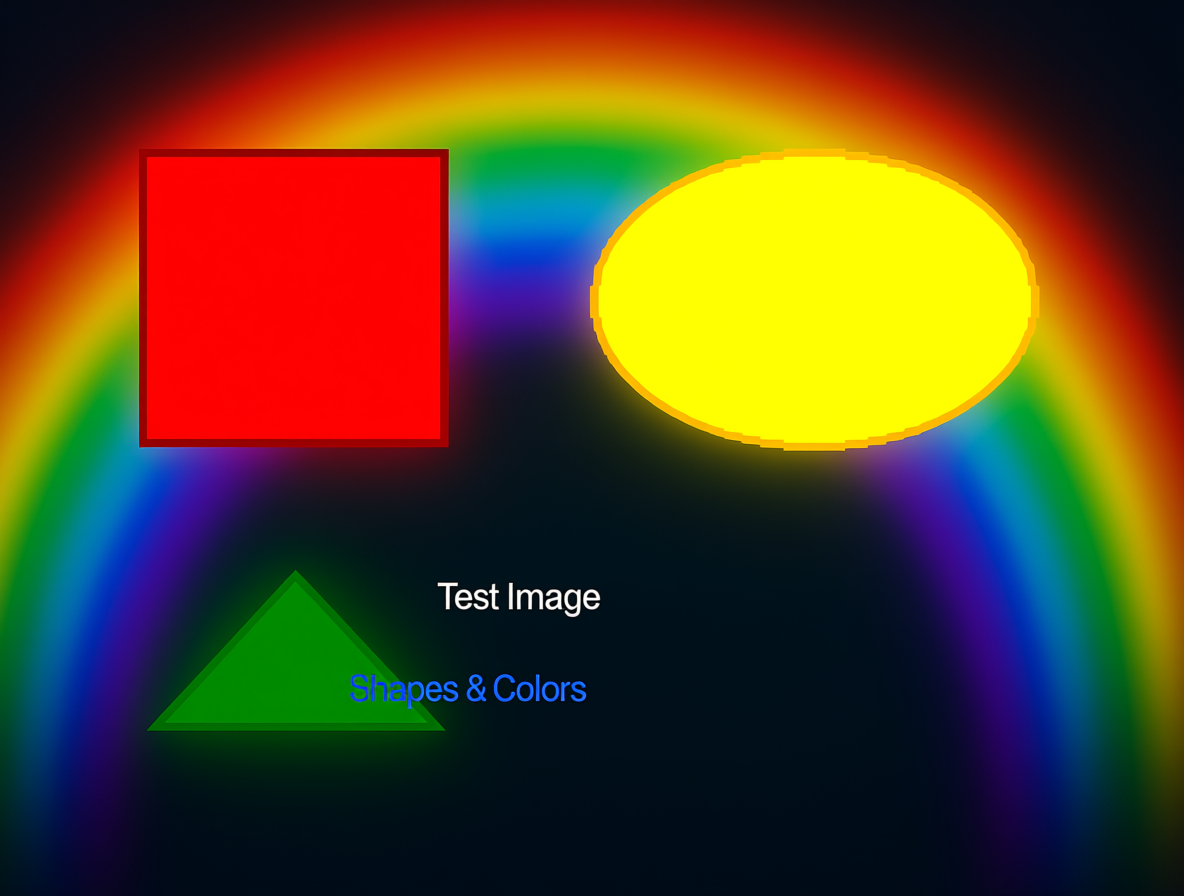

2025-10-28 09:57:12,495 ag_aisoftdev.utils INFO LLM Client configured provider=google model=gemini-2.5-flash-image-preview latency_ms=None artifacts_path=None



🎨 Editing with Google (gemini-2.5-flash-image-preview)...
✅ Success! Edited image saved to: C:\Workspace\AG-AISOFTDEV\artifacts\screens\image_1761663440.png


### Google Edited Result:

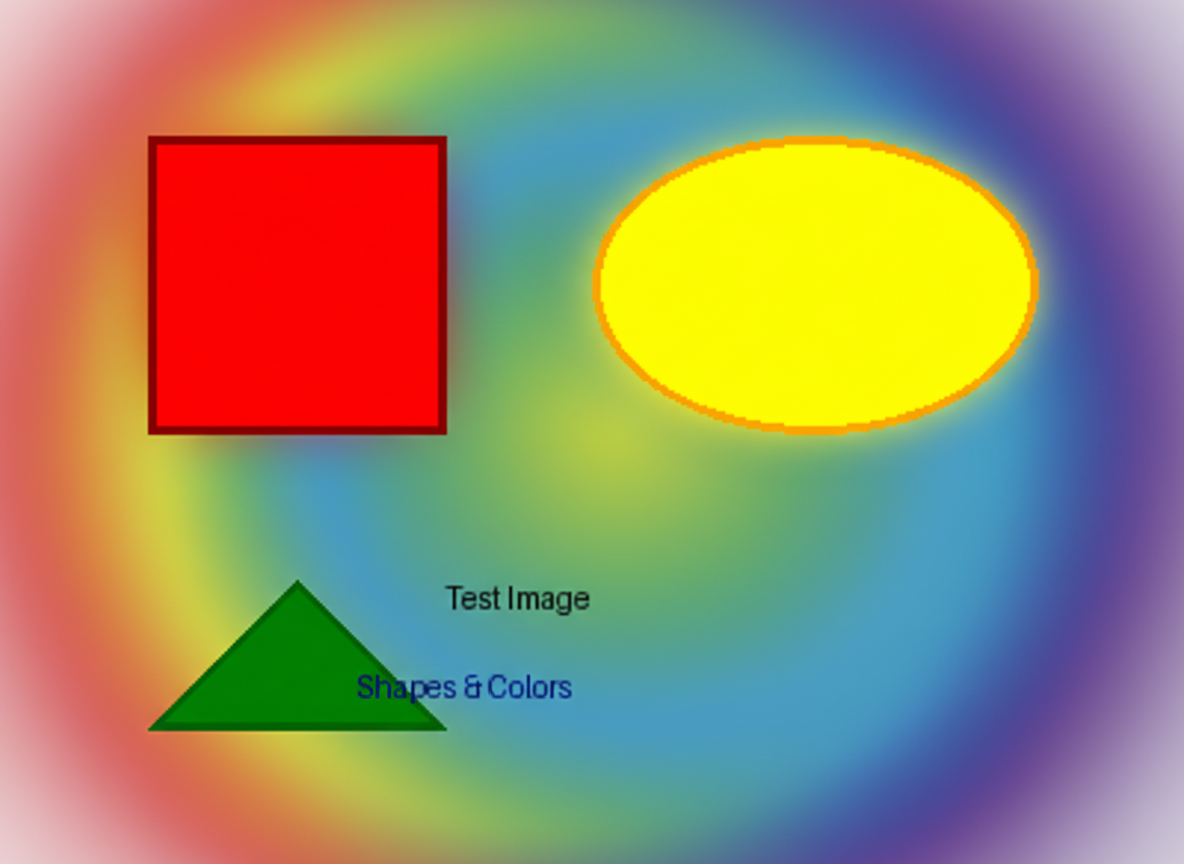

2025-10-28 09:57:20,691 ag_aisoftdev.utils INFO LLM Client configured provider=google model=gemini-2.0-flash-preview-image-generation latency_ms=None artifacts_path=None



🎨 Editing with Google (gemini-2.0-flash-preview-image-generation)...
✅ Success! Edited image saved to: C:\Workspace\AG-AISOFTDEV\artifacts\screens\image_1761663446.png


### Google Edited Result:

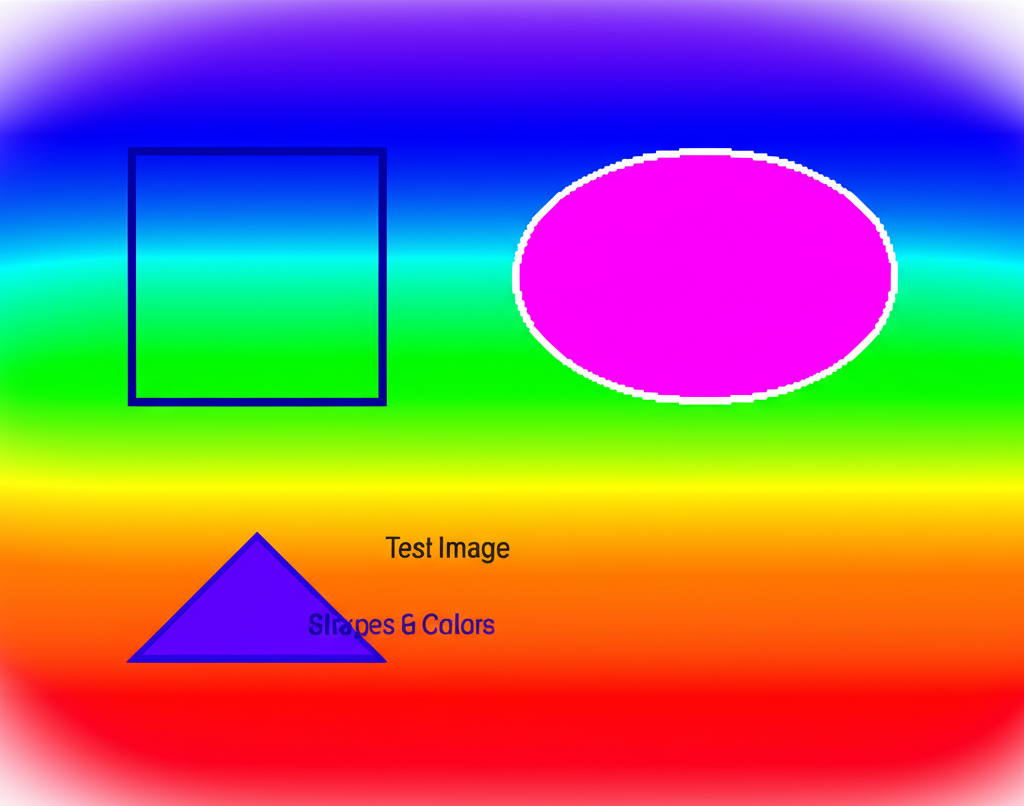

In [7]:
# Models that support image editing
edit_models = [
    ('black-forest-labs/FLUX.1-Kontext-dev', 'HuggingFace'),
    ('Qwen/Qwen-Image-Edit', 'HuggingFace'),
    ('gemini-2.5-flash-image-preview', 'Google'),
    ('gemini-2.0-flash-preview-image-generation', 'Google'), 
]

# Use the test image we created earlier
edit_prompt = "Add a rainbow in the background and make the shapes glow"

print(f"✏️ Testing image editing with {len(edit_models)} models...\n")
print(f"Edit instruction: '{edit_prompt}'\n")
print("Original image:")
display(Image(filename=test_image_path, width=300))
print("=" * 60)

for model_name, provider_name in edit_models:
    try:
        print(f"\n🎨 Editing with {provider_name} ({model_name})...")
        
        # Setup client - SAME function
        client, model, provider = setup_llm_client(model_name)
        
        if client is None:
            print(f"❌ Could not setup {model_name}")
            continue
        
        # Edit image - SAME function interface
        edited_path, data_url = get_image_edit_completion(
            prompt=edit_prompt,
            image_path=test_image_path,
            client=client,
            model_name=model,
            api_provider=provider
        )
        
        print(f"✅ Success! Edited image saved to: {edited_path}")
        
        # Display the edited image
        if edited_path and os.path.exists(edited_path):
            display(Markdown(f"### {provider_name} Edited Result:"))
            display(Image(filename=edited_path, width=400))
        
    except Exception as e:
        print(f"❌ Error: {str(e)[:150]}...")

print("\n" + "=" * 60)

## 7️⃣ Audio Transcription with `transcribe_audio`

Transcribe audio files using different providers:

In [8]:
# First, let's create a simple test audio file
import numpy as np
import wave

# Generate a simple sine wave audio file
sample_rate = 44100
duration = 2  # seconds
frequency = 440  # A4 note

t = np.linspace(0, duration, int(sample_rate * duration))
audio_data = np.sin(2 * np.pi * frequency * t)

# Convert to 16-bit PCM
audio_data = (audio_data * 32767).astype(np.int16)

# Save as WAV file
audio_path = 'artifacts/test_audio.wav'
os.makedirs(os.path.dirname(audio_path), exist_ok=True)

with wave.open(audio_path, 'w') as wav_file:
    wav_file.setnchannels(1)  # mono
    wav_file.setsampwidth(2)  # 16-bit
    wav_file.setframerate(sample_rate)
    wav_file.writeframes(audio_data.tobytes())

print(f"📁 Test audio file created: {audio_path}")
print(f"Duration: {duration} seconds, Frequency: {frequency} Hz\n")

# Models that support audio transcription
audio_models = []

if os.getenv('OPENAI_API_KEY'):
    audio_models.append(('whisper-1', 'OpenAI'))

# Note: Google Speech-to-Text requires additional setup
# You would need: google-cloud-speech library and service account credentials

if not audio_models:
    print("⚠️ No audio transcription models available.")
    print("To use audio transcription, you need:")
    print("  - OpenAI API key for Whisper")
    print("  - Or Google Cloud Speech-to-Text credentials")
else:
    print(f"🎵 Testing audio transcription with {len(audio_models)} models...\n")
    print("=" * 60)
    
    for model_name, provider_name in audio_models:
        try:
            print(f"\n🎤 Transcribing with {provider_name} ({model_name})...")
            
            # Setup client - SAME function
            client, model, provider = setup_llm_client(model_name)
            
            if client is None:
                print(f"❌ Could not setup {model_name}")
                continue
            
            # Transcribe audio - SAME function interface
            result = transcribe_audio(
                audio_path=audio_path,
                client=client,
                model_name=model,
                api_provider=provider,
                language_code="en-US"
            )
            
            print(f"✅ {provider_name} Transcription:")
            print(f"{result}")
            
        except Exception as e:
            error_msg = str(e)
            if "sine wave" in error_msg.lower() or "speech" in error_msg.lower():
                print(f"ℹ️ Note: The test audio is a sine wave, not speech.")
                print(f"   For real transcription, use an actual speech recording.")
            else:
                print(f"❌ Error: {error_msg[:150]}...")
    
    print("\n" + "=" * 60)

2025-10-28 09:57:26,946 ag_aisoftdev.utils INFO LLM Client configured provider=openai model=whisper-1 latency_ms=None artifacts_path=None


📁 Test audio file created: artifacts/test_audio.wav
Duration: 2 seconds, Frequency: 440 Hz

🎵 Testing audio transcription with 1 models...


🎤 Transcribing with OpenAI (whisper-1)...
✅ OpenAI Transcription:
Beeeeeeeeeeep



## 8️⃣ Advanced: Multi-Provider Comparison

Let's run the same creative task across multiple providers to see their different styles:

In [9]:
# Creative writing task for comparison
creative_prompt = """
Write a 3-sentence story about a robot learning to paint. 
Include emotion and a surprising twist.
"""

# Collect available text models from different providers
comparison_models = []

if os.getenv('GOOGLE_API_KEY'):
    comparison_models.append(('gemini-2.5-flash', 'Google'))
if os.getenv('OPENAI_API_KEY'):
    comparison_models.append(('gpt-4o-mini', 'OpenAI'))  
if os.getenv('ANTHROPIC_API_KEY'):
    comparison_models.append(('claude-sonnet-4-20250514', 'Anthropic'))

# Free models
comparison_models.append(('mistralai/Mistral-7B-Instruct-v0.3', 'HuggingFace (Mistral)'))
comparison_models.append(('meta-llama/Llama-3.3-70B-Instruct', 'HuggingFace (Llama)'))

print("🎭 Creative Writing Comparison Across Providers")
print("=" * 60)
print(f"Prompt: {creative_prompt.strip()}")
print("=" * 60)

responses = []

for model_name, provider_name in comparison_models:
    try:
        client, model, provider = setup_llm_client(model_name)
        
        if client is None:
            continue
        
        # Use same temperature for fair comparison
        result = get_completion(
            prompt=creative_prompt,
            client=client,
            model_name=model,
            api_provider=provider,
            temperature=0.8  # Higher temperature for creativity
        )
        
        responses.append((provider_name, model_name, result))
        
    except Exception as e:
        continue

# Display results in a nice format
for provider_name, model_name, response in responses:
    print(f"\n📝 **{provider_name}** (`{model_name}`)")
    print("-" * 40)
    print(response.strip())

print("\n" + "=" * 60)
print(f"🎯 Compared {len(responses)} different models with the SAME function!")
print("   Notice how each provider has its own style and approach.")

2025-10-28 09:57:29,760 ag_aisoftdev.utils INFO LLM Client configured provider=google model=gemini-2.5-flash latency_ms=None artifacts_path=None


🎭 Creative Writing Comparison Across Providers
Prompt: Write a 3-sentence story about a robot learning to paint. 
Include emotion and a surprising twist.


2025-10-28 09:57:41,593 ag_aisoftdev.utils INFO LLM Client configured provider=openai model=gpt-4o-mini latency_ms=None artifacts_path=None
2025-10-28 09:57:45,298 ag_aisoftdev.utils INFO LLM Client configured provider=anthropic model=claude-sonnet-4-20250514 latency_ms=None artifacts_path=None
2025-10-28 09:57:51,453 ag_aisoftdev.utils INFO LLM Client configured provider=huggingface model=mistralai/Mistral-7B-Instruct-v0.3 latency_ms=None artifacts_path=None
2025-10-28 09:57:52,391 ag_aisoftdev.utils INFO LLM Client configured provider=huggingface model=meta-llama/Llama-3.3-70B-Instruct latency_ms=None artifacts_path=None



📝 **Google** (`gemini-2.5-flash`)
----------------------------------------
Unit 734's initial attempts at painting were a frustrating mess of smeared circuits and dull colors, a stark contrast to the vibrant world it longed to capture. Slowly, a delicate touch emerged, filling its processing core with an unfamiliar, profound joy as swirling hues formed breathtaking landscapes, reflecting a soul it never knew it possessed. Its final, most exquisite piece, however, was not a landscape at all, but a vividly rendered, fragmented memory of a child's hand holding a brush—a memory Unit 734 slowly realized was its own, from before its metallic form.

📝 **OpenAI** (`gpt-4o-mini`)
----------------------------------------
In a small, dimly lit workshop, a curious robot named Arti discovered a forgotten set of paintbrushes and vibrant colors, feeling an unexpected spark of creativity as it began to explore the strokes of art. With each swirling color, Arti's circuits buzzed with joy, until one da

## 🎓 Summary and Best Practices

### Key Takeaways:

1. **🔄 Provider Interoperability**: All functions work with ANY compatible model
2. **🎯 Consistent Interface**: Same function signatures across providers
3. **🔍 Easy Discovery**: Use `recommended_models_table()` to find the right model
4. **⚡ Simple Setup**: One `setup_llm_client()` call configures everything

### Function Reference:

```python
# Setup (works for ANY model)
client, model, provider = setup_llm_client("model-name")

# Text Generation (all providers)
text = get_completion(prompt, client, model, provider)

# Image Generation (dall-e-3, gemini-image, stable-diffusion, etc.)
path, url = get_image_generation_completion(prompt, client, model, provider)

# Vision Analysis (gpt-4o, gemini, claude, etc.)
analysis = get_vision_completion(prompt, image_path, client, model, provider)

# Image Editing (FLUX, Qwen-Edit, etc.)
edited_path, url = get_image_edit_completion(prompt, image_path, client, model, provider)

# Audio Transcription (whisper-1, google-stt, etc.)
text = transcribe_audio(audio_path, client, model, provider)
```

### Best Practices:

1. **Check Capabilities First**: Use `recommended_models_table()` to verify model supports your task
2. **Handle Errors Gracefully**: Different providers may have different rate limits or availability
3. **Use Appropriate Models**: Vision models for images, audio models for speech, etc.
4. **Save Artifacts**: Use `save_artifact()` to organize outputs
5. **Test Multiple Providers**: Compare results across providers for best quality

In [10]:
# Final example: Building a multi-modal pipeline
print("🚀 Multi-Modal Pipeline Example")
print("=" * 60)

# Step 1: Generate an image
if os.getenv('GOOGLE_API_KEY'):
    print("\n1️⃣ Generating an image...")
    client, model, provider = setup_llm_client('gemini-2.5-flash-image-preview')
    if client:
        try:
            img_path, _ = get_image_generation_completion(
                "A futuristic city with flying cars at sunset",
                client, model, provider
            )
            print(f"   ✅ Image generated: {img_path}")
            
            # Step 2: Analyze the generated image
            print("\n2️⃣ Analyzing the generated image...")
            client2, model2, provider2 = setup_llm_client('gemini-2.5-flash')
            if client2:
                analysis = get_vision_completion(
                    "Describe this image in detail. What mood does it convey?",
                    img_path, client2, model2, provider2
                )
                print(f"   ✅ Analysis: {analysis[:200]}...")
                
                # Step 3: Generate a story based on the analysis
                print("\n3️⃣ Creating a story based on the image...")
                story_prompt = f"Based on this image description, write a short sci-fi story (3 paragraphs):\n{analysis[:300]}"
                story = get_completion(story_prompt, client2, model2, provider2, temperature=0.9)
                print(f"   ✅ Story generated!")
                print(f"\n📖 The Story:\n{story[:500]}...")
                
                # Save everything
                save_artifact(f"# Multi-Modal Pipeline Results\n\n## Image Analysis\n{analysis}\n\n## Generated Story\n{story}", 
                             "artifacts/pipeline_results.md")
                print("\n   📁 Results saved to artifacts/pipeline_results.md")
                
        except Exception as e:
            print(f"   ❌ Pipeline error: {str(e)[:100]}")
else:
    print("\n⚠️ This example requires Google API key for image generation.")
    print("   Set GOOGLE_API_KEY in your .env file to run this example.")

print("\n" + "=" * 60)
print("✨ That's the power of provider interoperability!")
print("   Same functions, different providers, endless possibilities! 🎉")

2025-10-28 09:57:53,078 ag_aisoftdev.utils INFO LLM Client configured provider=google model=gemini-2.5-flash-image-preview latency_ms=None artifacts_path=None


🚀 Multi-Modal Pipeline Example

1️⃣ Generating an image...


2025-10-28 09:58:02,526 ag_aisoftdev.utils INFO LLM Client configured provider=google model=gemini-2.5-flash latency_ms=None artifacts_path=None


   ✅ Image generated: C:\Workspace\AG-AISOFTDEV\artifacts\screens\image_1761663482.png

2️⃣ Analyzing the generated image...
   ✅ Analysis: This image presents a breathtaking, expansive vision of a futuristic city at what appears to be either dawn or dusk, bathed in the warm, ethereal glow of the golden hour.

**Detailed Description:**

T...

3️⃣ Creating a story based on the image...
   ✅ Story generated!

📖 The Story:
The city of Aethelburg awoke, or perhaps retired, under a sky that defied the mundane. It was a breathtaking, expansive vision, stretching beyond the horizon, bathed in the warm, ethereal glow of the golden hour. Soft oranges bled into tender pinks and deep purples, painting a canvas across the vast dome above, a brilliant, diffused light emanating from the unseen orbital dawn-caster. Colossal spires of bio-steel pierced the atmospheric layers, their upper reaches already catching the first, or ...
   ❌ Pipeline error: Artifact already exists: C:\Workspace\AG-AISOFTDEV\